# Mars Weather Project
## By Caroline Cavaliere 
---
## Overview 
For this project, I have utilized Python's data science libraries and compatibility with Jupyter Notebook to retrieve, manipulate, and display Mars weather data from the [Curiosity rover](https://mars.nasa.gov/msl/weather/). My end goal was to create a stacked bar graph of the max/min temperatures from the seven most recent Sols (Mars days) that have been recorded by NASA. To demonstrate Python's capabilities in retrieving data from an API and displaying images, I have also retrieved the latest photo from one of the cameras on the [Perseverance rover] (https://api.nasa.gov/mars-photos/api/v1/rovers/perseverance/latest_photos?api_key=DEMO_KEY). For both the weather data and picture, once the API or website is updated, the cells in this notebook can be ran again to show updated displays.

---
## File listing
* chromedriver.exe : Executable file for the Chromedriver which is used to retrieve the weather data. Copied into project for convenience.
* getData.py : Separate Python file for retrieving and writing HTML weather data to a file.
* mars_weather.html : The file getData.py writes. It contains all of the HTML from https://mars.nasa.gov/msl/weather/
* mars_weather.ipynb : Jupyter Notebook (main part of the project). Includes the written report, the majority of the Python code, and the graph and picture.
* MarsCuriosityRoverWeather.jpg : picture of weather data table from the Curiosity rover (for explanatory purposes)
* README.md : Requirements for opening/running the project
* requirements.txt : All of the required packages to install (created with command: pip freeze > requirements.txt which outputs the package+version installed in the current environment)
---
## Project objectives
* Download ML data from the Curiosity Rover website using Selenium
* Store HTML weather table data in Pandas DataFrame
* Plot the data using Matplotlib
* Get the latest photo from the NASA Perseverance API using Requests and display with Pandas and Skimage
---
### This is the table we are trying to scrape.  
![WeatherTable](MarsCuriosityRoverWeather.jpg)




In [1]:
#install all required packages
!pip install -r "requirements.txt"

^C


In [2]:
# packages needed for getting/plotting data
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
%matplotlib inline  

# packages needed for getting/displaying image
import requests 
from skimage import io
from skimage.io import imread, imshow
from skimage.viewer import ImageViewer
import json 


<ipython-input-2-ea387c3de961>:12: UserWarning: Viewer requires Qt
  from skimage.viewer import ImageViewer


# Getting the data from the Curiosity Rover

### Code highlight #1 (reference getData.py)
This file uses the Selenium library and the Chrome WebDriver to write the HTML from the Curiosity site to mars_weather.html. This HTML file is later used to access the weather data table so it can be plotted. On line 6, the URL of the site to be scraped is set to a variable. There is no type specified for this variable since Python is not a typed language. On lines 7-9, the options for the browser are set so that Selenium knows which WebDriver to use and that it does not need to open the browser. On line 10, a Selenium function is used to make the WebDriver wait until the data populates the table. Then, a new browser is launched, the HTML from the page is set to a new variable, and the browser is closed. Lines 14-19 demonstrate Python error-catching."with open" opens a new file stream and specifies that mars_weather.html will be written with 'w'. "except:" includes an error message to be printed if an error occurs during this process.

In [28]:
#run separate Python file to get HTML weather data
try:
    %run -i "getData.py" 
    print("successfully updated Mars weather data")
except:
    print("warning: could not update Mars weather data")

file was written
successfully updated Mars weather data


<Figure size 432x288 with 0 Axes>

In [29]:
#select weather table from html file using Pandas
html = pd.read_html("mars_weather.html", attrs={'id': 'weather_observation'}) 
htmlTable = html[0] #access new DataFrame object
htmlTable


Date                Sol Air Temperature (°F | °C)          \
  Unnamed: 0_level_1 Unnamed: 1_level_1                      Max.    Min.   
0       Apr. 7, 2021               3082                       9°F  -105°F   
1       Apr. 6, 2021               3081                       3°F  -105°F   
2       Apr. 5, 2021               3080                      -2°F  -105°F   
3       Apr. 4, 2021               3079                      10°F  -101°F   
4       Apr. 3, 2021               3078                      12°F   -99°F   
5       Apr. 2, 2021               3077                      10°F  -101°F   
6       Apr. 1, 2021               3076                      10°F   -99°F   

       Pressure (Pa)            Sunrise             Sunset  
  Unnamed: 4_level_1 Unnamed: 5_level_1 Unnamed: 6_level_1  
0                850              06:25              18:17  
1                850              06:25              18:17  
2                850              06:25              18:18  
3                849              06:26              18:18  
4                849              06:26              18:18  
5                848              06:26              18:19  
6                847              06:26              18:19

In [30]:
#get rid of multi-level column headings
htmlTable.columns = htmlTable.columns.droplevel(1) 
htmlTable

,Date,Sol,Air Temperature (°F | °C),Air Temperature (°F | °C),Pressure (Pa),Sunrise,Sunset
0,"Apr. 7, 2021",3082,9°F,-105°F,850,06:25,18:17
1,"Apr. 6, 2021",3081,3°F,-105°F,850,06:25,18:17
2,"Apr. 5, 2021",3080,-2°F,-105°F,850,06:25,18:18
3,"Apr. 4, 2021",3079,10°F,-101°F,849,06:26,18:18
4,"Apr. 3, 2021",3078,12°F,-99°F,849,06:26,18:18
5,"Apr. 2, 2021",3077,10°F,-101°F,848,06:26,18:19
6,"Apr. 1, 2021",3076,10°F,-99°F,847,06:26,18:19


In [31]:
#rename column headings
htmlTable.columns = ['Date', 'Sol', 'MaxTemp', 'MinTemp', 'Pressure', 'Sunrise', 'Sunset'] 
htmlTable

,Date,Sol,MaxTemp,MinTemp,Pressure,Sunrise,Sunset
0,"Apr. 7, 2021",3082,9°F,-105°F,850,06:25,18:17
1,"Apr. 6, 2021",3081,3°F,-105°F,850,06:25,18:17
2,"Apr. 5, 2021",3080,-2°F,-105°F,850,06:25,18:18
3,"Apr. 4, 2021",3079,10°F,-101°F,849,06:26,18:18
4,"Apr. 3, 2021",3078,12°F,-99°F,849,06:26,18:18
5,"Apr. 2, 2021",3077,10°F,-101°F,848,06:26,18:19
6,"Apr. 1, 2021",3076,10°F,-99°F,847,06:26,18:19


### Code Highlight #2 (remove temperature formatting)
In order to plot the data, it must be of numerical type. The original table includes "°F" after each number, which will need to be removed before graphing. The Pandas "replace" function allows the use of regex to specify that the degree symbol and everything after it ('°.*') should be removed (replaced with ''). The "inplace" parameter indicates that the DataFrame object should be permanently changed with this new formatting. The DataFrame with its updated formatting is displayed below the cell by putting the variable name alone on its own line. 

In [32]:
# remove temperature formatting using regex
htmlTable.MaxTemp.replace('°.*', '', regex = True, inplace = True) #inplace permanently changes the DataFrame object
htmlTable.MinTemp.replace('°.*', '', regex = True, inplace = True)
htmlTable

,Date,Sol,MaxTemp,MinTemp,Pressure,Sunrise,Sunset
0,"Apr. 7, 2021",3082,9,-105,850,06:25,18:17
1,"Apr. 6, 2021",3081,3,-105,850,06:25,18:17
2,"Apr. 5, 2021",3080,-2,-105,850,06:25,18:18
3,"Apr. 4, 2021",3079,10,-101,849,06:26,18:18
4,"Apr. 3, 2021",3078,12,-99,849,06:26,18:18
5,"Apr. 2, 2021",3077,10,-101,848,06:26,18:19
6,"Apr. 1, 2021",3076,10,-99,847,06:26,18:19


In [33]:
#check data types before plotting
htmlTable.info(verbose=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      7 non-null      object
 1   Sol       7 non-null      int64 
 2   MaxTemp   7 non-null      object
 3   MinTemp   7 non-null      object
 4   Pressure  7 non-null      int64 
 5   Sunrise   7 non-null      object
 6   Sunset    7 non-null      object
dtypes: int64(2), object(5)
memory usage: 520.0+ bytes


In [34]:
#convert to integer
htmlTable['MaxTemp'] = pd.to_numeric(htmlTable['MaxTemp']) 
htmlTable['MinTemp'] = pd.to_numeric(htmlTable['MinTemp'])
htmlTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      7 non-null      object
 1   Sol       7 non-null      int64 
 2   MaxTemp   7 non-null      int64 
 3   MinTemp   7 non-null      int64 
 4   Pressure  7 non-null      int64 
 5   Sunrise   7 non-null      object
 6   Sunset    7 non-null      object
dtypes: int64(4), object(3)
memory usage: 520.0+ bytes


In [35]:
#drop columns that will not be plotted
htmlTable.drop(['Date'], axis=1, inplace = True)
htmlTable.drop(['Pressure'], axis=1, inplace = True)
htmlTable.drop(['Sunrise'], axis=1, inplace = True)
htmlTable.drop(['Sunset'], axis=1, inplace = True)
htmlTable

,Sol,MaxTemp,MinTemp
0,3082,9,-105
1,3081,3,-105
2,3080,-2,-105
3,3079,10,-101
4,3078,12,-99
5,3077,10,-101
6,3076,10,-99


# Plotting the data

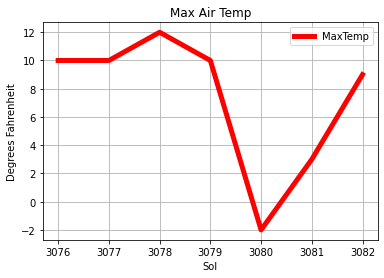

In [12]:
maxTempGraph = htmlTable.plot(title='Max Air Temp', x = 'Sol', y = 'MaxTemp', grid=True, linewidth=5, color='r', ylabel = "Degrees Fahrenheit")

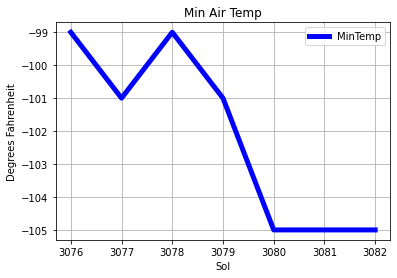

In [25]:
minTempGraph = htmlTable.plot(title='Min Air Temp', x = 'Sol', y = 'MinTemp', grid=True, linewidth=5, color='b', ylabel = 'Degrees Fahrenheit')

### Code Highlight #3 (creating the stacked bar graph)
The first three lines set each column of the htmlTable DataFrame to a new variable. Throughout this snippet, "plt" is used as an alias for the Matplotlib Pyplot module. The functions in the Pyplot module are then used to format and style the graph with different colors, labels, and spacing. When assigning maxPlot and minPlot with the "bar" function, Matplotlib will combine maxPlot and minPlot into a stacked bar graph since "x" is used as the x-axis in both graphs. In the "bar_label" function, the "label_type" parameters specify that the max temps should sit on top of the bar, and the min temps should display in the middle. The format string '%g°' specifies that a degree symbol should appear after each number. Finally, "plt.show()" displays the final graph. 

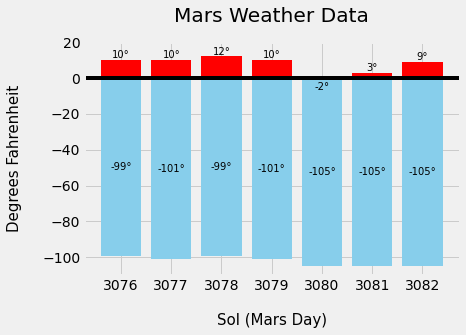

In [38]:
#create stacked bar graph to display min and max temps
x = htmlTable.Sol
y1 = htmlTable.MinTemp
y2 = htmlTable.MaxTemp
plt.style.use('fivethirtyeight') #use built-in style from matplotlib
maxPlot = plt.bar(x, y2, color = 'red')
minPlot = plt.bar(x, y1, color = 'skyblue')
plt.ylim([-110, 20]) #set the y-axis limits
plt.axhline(0, color = 'black') #create line at 0
plt.xlabel('Sol (Mars Day)', labelpad = 20, fontsize = 15)
plt.ylabel('Degrees Fahrenheit', labelpad = 20, fontsize = 15)
plt.title('Mars Weather Data', pad = 20)
plt.bar_label(maxPlot, label_type='edge', fmt='%g°', fontsize=10) #add labels to the bars 
plt.bar_label(minPlot, label_type='center', fmt='%g°', fontsize=10)
plt.show()

# Get latest photo from Perseverance Rover (MCZ_LEFT camera)

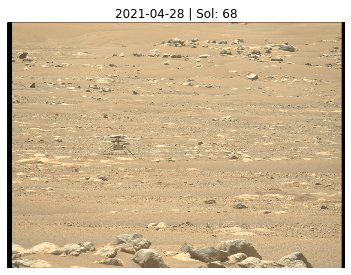

In [3]:
perseverancePhotoAPI = 'https://api.nasa.gov/mars-photos/api/v1/rovers/perseverance/latest_photos'
params = {'camera': 'MCZ_LEFT', 'api_key': "DEMO_KEY"} #specify which camera (try REAR_HAZCAM_RIGHT)
getPhotos = requests.get(perseverancePhotoAPI, params = params) #use requests library to get access to Perseverance API
loadPhoto = json.loads(getPhotos.text) #load json text into variable

photos = pd.DataFrame(loadPhoto['latest_photos'][0]) #load latest photo into DataFrame
display = photos['img_src'] #access image link from DataFrame

image = io.imread(display.id) #use Skimage to read image

earth_date = loadPhoto['latest_photos'][0]['earth_date'] 
sol = loadPhoto['latest_photos'][0]['sol']
strSol = str(sol)

plt.subplot() #create plot to display photo
imshow(image) #display image onto plot
plt.title(earth_date + ' | Sol: ' + strSol)
plt.axis('off') #turn off grid lines
plt.show() #show plot
